# TF Neural Network

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

In [0]:
n_features = 10
n_dense_neurons = 3

In [0]:
x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))#weights
b = tf.Variable(tf.ones([n_dense_neurons]))#biases
xW = tf.matmul(x,W)#Layer input to weight multipliication
z = tf.add(xW,b)
a = tf.sigmoid(z)#activation function

init = tf.global_variables_initializer()

In [6]:
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})
  
print(layer_out)

[[0.725475   0.43900672 0.3084785 ]]


## Simple Linear Regression

In [7]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([0.16268277, 0.66750697, 1.26789943, 4.19013862, 5.84089411,
       4.75261654, 5.41735097, 8.08842304, 9.57586716, 9.32871649])

In [8]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_data

array([ 0.55591899,  1.16471353,  0.86767583,  2.24694105,  3.50534672,
        7.03850926,  6.72866286,  8.01414638,  9.59334606, 10.12588532])

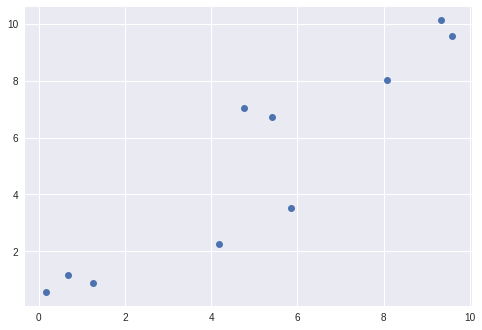

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data,'o')

In [15]:
#y = mx + b
np.random.rand(2)

array([0.91315356, 0.80792015])

In [0]:
m = tf.Variable(0.91)
b = tf.Variable(0.80)#both are randomly selected
error = 0 #initially error is zero

for x,y in zip(x_data, y_data):
  y_hat = m*x + b
  error = error + (y-y_hat)**2
  
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  training_steps = 10 # as our data is very small only 2 steps were enough ;)
  
  for i in range(training_steps):
    sess.run(train)
    
  final_slope, final_intercept = sess.run([m,b])

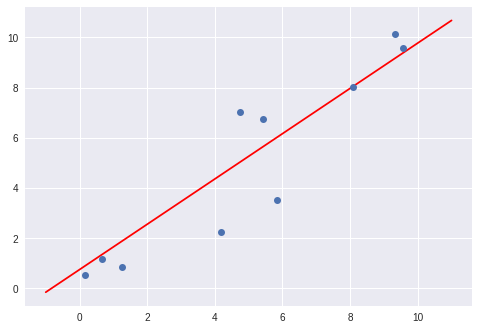

In [26]:
x_test = np.linspace(-1,11,10)

y_pred = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_data,'o')